In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pal = sns.color_palette()

In [2]:
original_data = pd.read_csv('data/updtedDataset.txt', sep='\t', encoding='utf-8', low_memory=False)

In [3]:
print('Total records before removing NIU:', len(original_data))

Total records before removing NIU: 1048575


In [4]:
original_data = original_data[original_data["Childs age at death in month (including imputed)"] != 'NIU (not in universe)']

In [5]:
print('Total records after removing NIU:', len(original_data))

Total records after removing NIU: 72080


# Separate class label

In [6]:
y = original_data["Childs age at death in month (including imputed)"]

# Drop identifiers

In [7]:
X = original_data.drop(['SAMPLE','COUNTRY', 'Year of Sample', 'Unique cross-sample respondent identifier','Unique cross-sample household identifier', 'Key to link DHS clusters to context data (string)', 'Unique sample-case PSU identifier', 'CASEID', 'Unique cross-sample sampling strata', 'Birth history index number', 'Sample weight for persons', 'All woman factor for total population', 'Weight for domestic violence module', 'Usual resident or visitor', 'Weight for age percentile (CDC standards)', 'Height for Age percentile (CDC standards)', 'Weight for height percentile (CDC standards)'], axis=1)
X = X.drop(["Childs age at death in month (including imputed)"], axis=1)

In [8]:
column_names = list(X.columns.values)
X.columns = column_names

In [9]:
X = X.replace('NIU (not in universe)', 'NIU')
X =  (X.replace(r'\s+', np.nan, regex=True))

In [10]:
X[['Doctor gave delivery care','Relative gave delivery care', 'Traditional birth attendant gave delivery care', 'Trained traditional birth attendant gave delivery care', 'Nurse/midwife gave delivery care', 'Auxiliary midwife gave delivery care']] = X[['Doctor gave delivery care','Relative gave delivery care', 'Traditional birth attendant gave delivery care', 'Trained traditional birth attendant gave delivery care', 'Nurse/midwife gave delivery care', 'Auxiliary midwife gave delivery care']].replace(['Missing', 'nan'], ['NIU', 'NIU'])

In [11]:
X[['Nurse/midwife gave prenatal care', 'Doctor gave prenatal care', 'Traditional birth attendant gave prenatal care']] = X[['Nurse/midwife gave prenatal care', 'Doctor gave prenatal care', 'Traditional birth attendant gave prenatal care']].replace(['Missing', 'nan'], ['NIU', 'NIU'])

In [12]:
X[['Source of fever/cough treatment: Public hospital', 'Source of fever/cough treatment: Public health center', 'Source of fever/cough treatment: Traditional healer/practitioner', 'Source of fever/cough treatment: Private hospital/clinic']] = X[['Source of fever/cough treatment: Public hospital', 'Source of fever/cough treatment: Public health center', 'Source of fever/cough treatment: Traditional healer/practitioner', 'Source of fever/cough treatment: Private hospital/clinic']].replace(['Missing', 'nan'], ['NIU', 'NIU'])

In [13]:
X = X.fillna(axis='index', method='ffill')

In [14]:
X['Skilled prenatal given by skilled provider'] = X[['Nurse/midwife gave prenatal care', 'Doctor gave prenatal care', 'Traditional birth attendant gave prenatal care']].fillna('').max(axis=1)

In [15]:
X['Skilled provider gave Delivery care'] = X[['Doctor gave delivery care','Relative gave delivery care', 'Traditional birth attendant gave delivery care', 'Trained traditional birth attendant gave delivery care', 'Nurse/midwife gave delivery care', 'Auxiliary midwife gave delivery care']].fillna('').max(axis=1)

In [16]:
X['Child received care for fever/cough'] = X[['Source of fever/cough treatment: Public hospital', 'Source of fever/cough treatment: Public health center', 'Source of fever/cough treatment: Traditional healer/practitioner', 'Source of fever/cough treatment: Private hospital/clinic']].fillna('').max(axis=1)



In [17]:
X = X.drop(['Nurse/midwife gave prenatal care', 'Doctor gave prenatal care', 'Traditional birth attendant gave prenatal care'], axis=1)

In [18]:
X = X.drop(['Doctor gave delivery care','Relative gave delivery care', 'Traditional birth attendant gave delivery care', 'Trained traditional birth attendant gave delivery care', 'Nurse/midwife gave delivery care', 'Auxiliary midwife gave delivery care'], axis=1)

In [19]:
X = X.drop(['Source of fever/cough treatment: Public hospital', 'Source of fever/cough treatment: Public health center', 'Source of fever/cough treatment: Traditional healer/practitioner', 'Source of fever/cough treatment: Private hospital/clinic'], axis = 1)

In [20]:
X.tail()

,URBAN-Rural status,Household wealth index in quintiles,Highest educational level,Final say on woman's health care,Unmet need for FP,Whether and when this child's pregnancy wanted,Sex of child,Current age of child in years,Age of child in months,Received prenatal care,...,Child received oral polio 2 vaccination,Year child received oral polio 3 vaccination,"Child received DPT (diphtheria, pertussis, tetanus) 1 vaccination","Child received DPT (diphtheria, pertussis, tetanus) 2 vaccination","Child received DPT (diphtheria, pertussis, tetanus) 3 vaccination",Child received measles (or measles containing) 1 vaccination,Child received BCG (TB) vaccination,Skilled prenatal given by skilled provider,Skilled provider gave Delivery care,Child received care for fever/cough
1048538,Urban,Richest,Primary,Husband/partner,Missing,Missing,Female,NIU,NIU,Yes,...,NIU,NIU,NIU,NIU,NIU,NIU,NIU,Yes,Yes,NIU
1048539,Urban,Richest,Primary,Husband/partner,Missing,Missing,Female,NIU,NIU,NIU,...,NIU,NIU,NIU,NIU,NIU,NIU,NIU,NIU,Yes,NIU
1048548,Urban,Richer,Primary,Husband/partner,Missing,Missing,Female,NIU,NIU,NIU,...,NIU,NIU,NIU,NIU,NIU,NIU,NIU,NIU,Yes,NIU
1048563,Urban,Richest,Primary,Husband/partner,Missing,Missing,Male,NIU,NIU,Yes,...,NIU,NIU,NIU,NIU,NIU,NIU,NIU,Yes,Yes,NIU
1048572,Urban,Richest,Primary,Husband/partner,Missing,Missing,Male,NIU,NIU,NIU,...,NIU,NIU,NIU,NIU,NIU,NIU,NIU,NIU,Yes,NIU


In [21]:
column_names = list(X.columns.values)


In [22]:
X = X.astype(str)

In [23]:
X.to_csv('data/clean_data.tsv', sep = '\t', index=False, encoding='utf-8')
X = np.array(X)
print('Total Records: ', X.shape[0])
print('Total Variables/Attributes: ', X.shape[1])

y = np.array(y)
print(y.shape)

Total Records:  72080
Total Variables/Attributes:  41
(72080,)


In [24]:
np.save('data/labels.npy', y)

# Plot Class Distribution

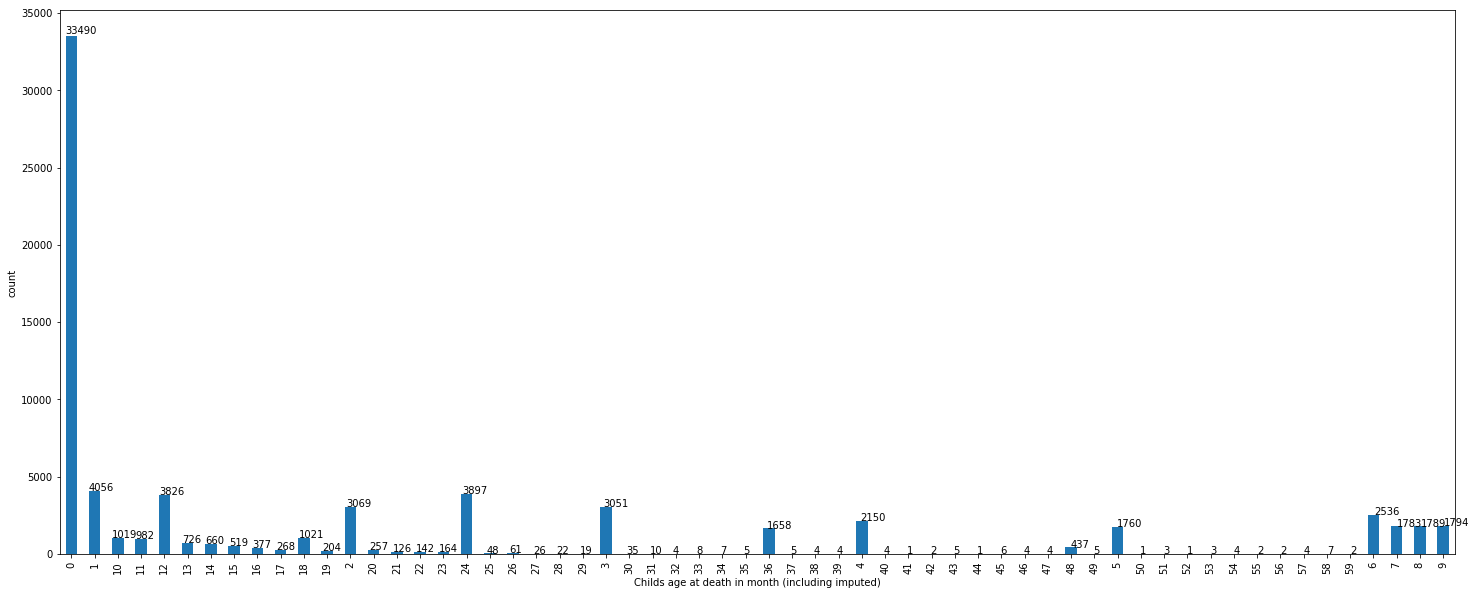

In [25]:
fig = plt.figure(figsize=(25,10))
ax = original_data.groupby("Childs age at death in month (including imputed)")["Childs age at death in month (including imputed)"].count().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.ylabel('count')
plt.show()

### So much labels are set as (NIU)

##### Let's look at log scaled

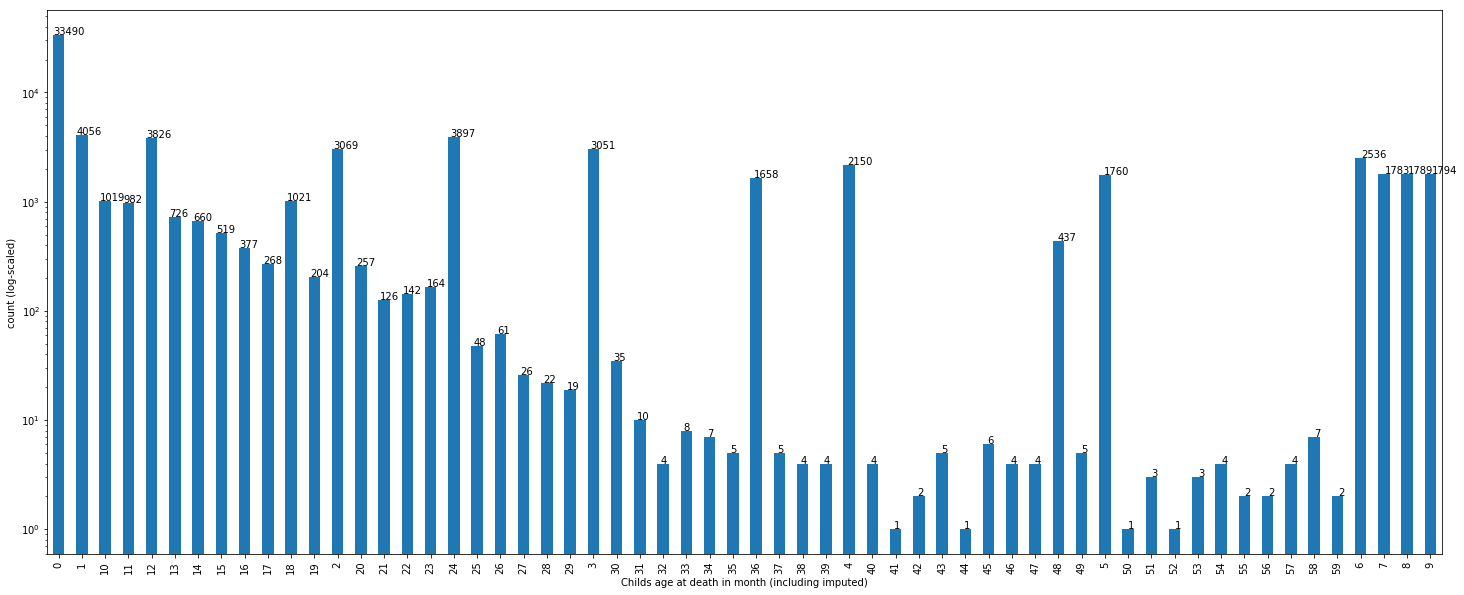

In [26]:
fig = plt.figure(figsize=(25,10))
ax = original_data.groupby("Childs age at death in month (including imputed)")["Childs age at death in month (including imputed)"].count().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax.set_yscale('log')
plt.ylabel('count (log-scaled)')
plt.show()

# Plot Feature Importance

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
X = np.nan_to_num(X)
for i in range (X.shape[1]):
    print(np.unique(X[:,i]))
    le = LabelEncoder()
    X[:,i] = le.fit_transform(X[:,i])
#le_y = LabelEncoder()
#y = le.fit_transform(y)  

['Rural' 'Urban']
['Middle' 'Poorer' 'Poorest' 'Richer' 'Richest']
['Higher' 'Missing' 'Primary' 'Secondary' 'nan']
['Husband/partner' 'Missing' 'NIU']
['Missing' 'NIU' 'nan']
['Missing' 'NIU' 'nan']
['Female' 'Male']
['NIU']
['NIU' 'nan']
['Missing' 'NIU' 'No' 'Yes']
['Missing' 'NIU' 'No' 'Yes']
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '21' '22' '23'
 '24' '25' '27' '28' '29' '3' '36' '4' '5' '6' '7' '8' '9' 'Missing' 'NIU'
 'nan']
['Missing' 'NIU' 'No' 'Yes']
['Missing' 'NIU' 'No' 'Yes']
['Missing' 'NIU' 'nan']
['Missing' 'NIU' 'No' 'Yes']
['102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112' '113'
 '114' '115' '120' '124' '130' '145' '160' '172' '202' '203' '204' '205'
 '206' '207' '208' '209' '210' '211' '212' '213' '214' '215' '218' '220'
 '221' '230' '237' '240' '242' '245' '302' '303' '304' '305' '306' '307'
 '308' '309' '310' '312' '314' '316' '319' '324' '390' 'Missing' 'NIU']
['10' '11' '12' '13' '14' '15' '16' '18' '2' '20' '21' '24' '25' '28' 

In [29]:
X

array([[1, 4, 4, ..., 1, 2, 0],
       [1, 4, 4, ..., 0, 2, 0],
       [1, 4, 2, ..., 2, 2, 0],
       ...,
       [1, 3, 2, ..., 0, 2, 0],
       [1, 4, 2, ..., 2, 2, 0],
       [1, 4, 2, ..., 0, 2, 0]], dtype=object)

In [30]:
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)


Feature ranking:
(1, 'Duration of breastfeeding in months (including still breastfed)', 0.3941082720560673)
(2, 'Number of antenatal visits when child was in utero', 0.1524450268309947)
(3, 'Household wealth index in quintiles', 0.1407386743744237)
(4, "Mother's health checked by professional after child's birth", 0.04646215647447455)
(5, 'Highest educational level', 0.04304155009775406)
(6, 'Tetanus injection before birth', 0.036021672576614205)
(7, 'Skilled prenatal given by skilled provider', 0.026647260749292703)
(8, 'URBAN-Rural status', 0.023330225919297665)
(9, "How long after delivery child's postnatal check took place", 0.019448555155820307)
(10, 'Sex of child', 0.019149995553050417)
(11, "Final say on woman's health care", 0.016825160940853453)
(12, 'Skilled provider gave Delivery care', 0.015326877439151992)
(13, "Mother's health check timing after delivery", 0.01382598556804878)
(14, 'Unmet need for FP', 0.01344111165690564)
(15, 'Other person gave delivery care', 0.0087679

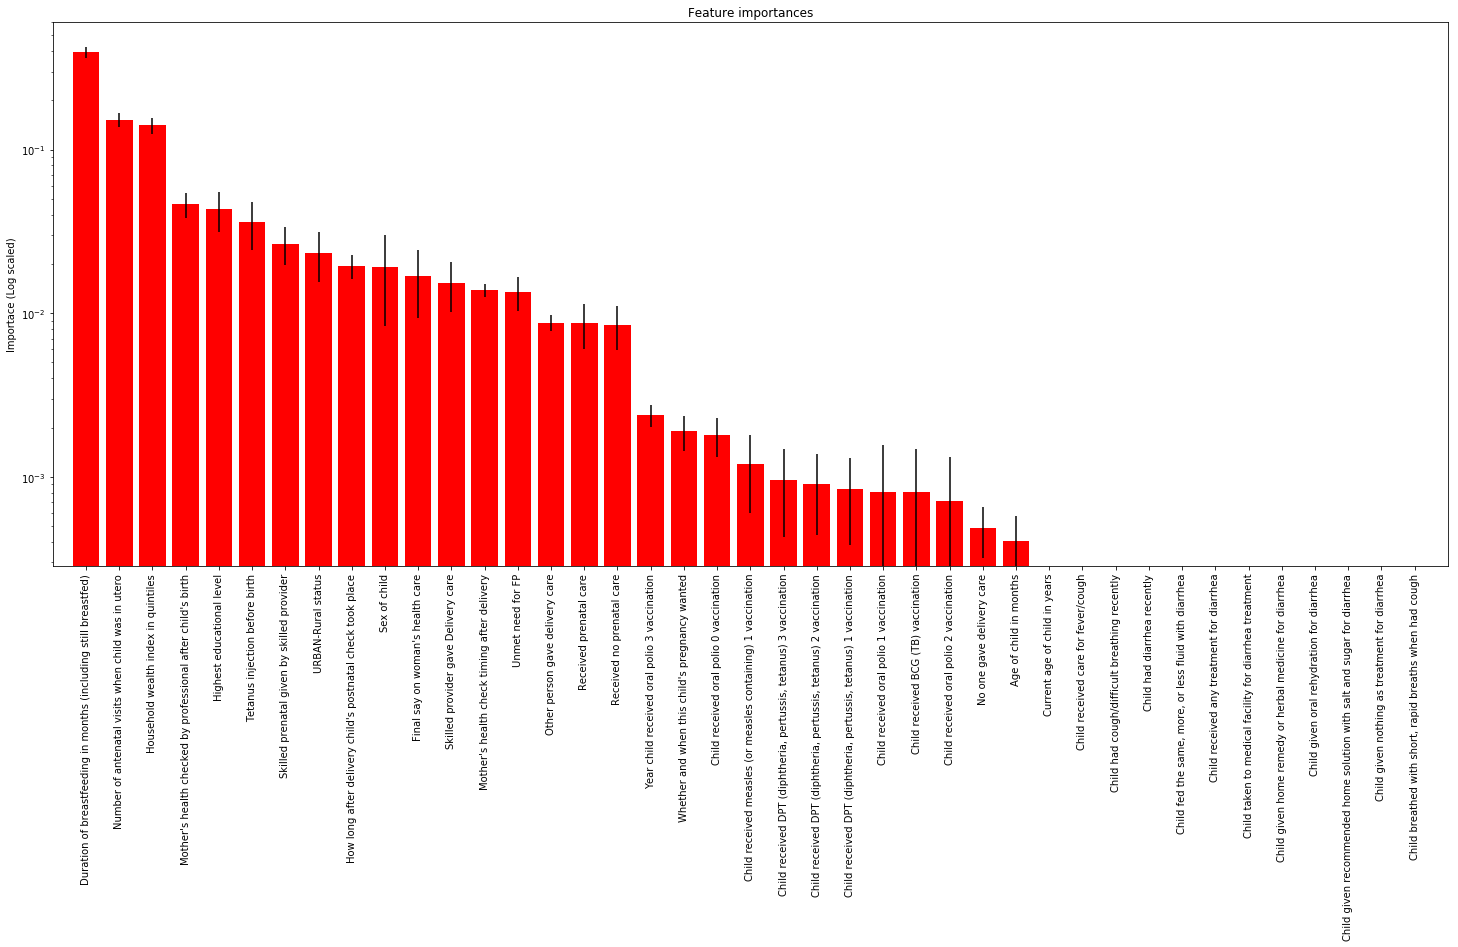

In [31]:
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
sorted_column_names = []
for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print((f + 1, column_names[indices[f]], importances[indices[f]]))
    sorted_column_names.append(column_names[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(25,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_column_names,  rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.yscale('log')
plt.ylabel('Importace (Log scaled)')
plt.savefig('feat_importance.pdf', format = 'pdf', dpi=600, bbox_inches='tight')
plt.savefig('feat_importance.png', format = 'png', dpi=600, bbox_inches='tight')

plt.show()